# Epic Games Store Data Analysis

<br>

# <font color='blue'>Introduction</font>

**The analysis type practiced in this notebook is descriptive analysis. It is at the foundation of all data insight. It is the simplest and most common use of data analysis methodologies in business today. Descriptive analysis answers the “what happened” by summarizing past/given data, usually in the form of dashboards.**

**EDA helps you discover relationships between measures in your data, which are not evidence for the existence of the correlation, as denoted by the phrase (Correlation doesn’t imply causation)**

>## EDA explores data to find relationships between measures that tells us they exist, without the cause. They can be used to formulate hypotheses.


# <font color='blue'>About Dataset</font>

**As a sophomore year in college, I play computer games a lot. Actually, a lot more than lot. So when I had to choose a dataset with which I could relate, I went for the Epic games Store Data. With my interest and domain knowledge about gaming industry, I will try to find out some interesting insights about games sold on Epic Store. <br><br>
Orginial Shape -<br><br>
Rows : 899<br>
Columns : 18**

## [Link to Dataset](https://www.kaggle.com/datasets/ramjasmaurya/epic-games-store)

# <font color='blue'>Data Preparation</font>

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

# data wrangling tools
import numpy as np
import pandas as pd

# visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import colors

import jovian

# loading the datset
df = pd.read_csv('./epic_games_data.csv')

In [2]:
pd.set_option('display.max_columns',25)

In [35]:
#outlier checking
df.describe().style.set_properties(**{"background-color": "grey","color": "black"})

,price,Critics Recommend,Top Critic Average,on_windows,on_mac,revenue_estimate
count,803.000000,487.000000,486.000000,899.000000,899.000000,420.000000
mean,702.870996,63.258727,75.839506,1.000000,0.130145,55789.532690
std,652.378884,23.414822,7.814536,0.000000,0.336650,62823.452961
min,0.000000,0.000000,46.000000,1.000000,0.000000,0.000000
25%,349.000000,47.000000,72.000000,1.000000,0.000000,21366.000000
50%,499.000000,67.000000,76.000000,1.000000,0.000000,36545.000000
75%,709.000000,82.000000,81.000000,1.000000,0.000000,57220.000000
max,4799.000000,100.000000,96.000000,1.000000,1.000000,446307.000000


# <font color='blue'>Data Cleaning</font>

In [4]:
df=df.drop(["game_link","os version","directx", "storage"],axis=1)

In [5]:
# making values ready for analysis
df["price"] = df["price"].str.replace("₹","")
df["price"] = df["price"].str.replace(",","")
df["price"] = df["price"].str.replace("Free","0")
df["price"] = df["price"].astype(float)

In [6]:
# Percentage values can be casted as float
df["Critics Recommend"] = df["Critics Recommend"].str.replace("%","")
df["Critics Recommend"] = df["Critics Recommend"].astype(float)

In [7]:
# removing extra words
df["publisher"] = df["publisher"].str.replace("Publisher","")

In [8]:
# removing extra words
df["platform"] = df["platform"].str.replace("Platform","")

In [9]:
# removing extra words
df["developer"] = df["developer"].str.replace("Developer","")

In [10]:
# converting dates to pandas datetime format
df["release date"] = df["release date"].str.replace("Release Date","")
df['release date'] = df['release date'].apply(lambda x: "01/01/2022" if 'a' in str(x).lower() else x)
df["release date"] = pd.to_datetime(df["release date"])

In [11]:
# avcailable on windows
df['on_windows'] = df['platform'].apply(lambda x: 1 if 'Windows' in x else 0)

In [12]:
# available on mac
df['on_mac'] = df['platform'].apply(lambda x: 1 if 'Mac' in x else 0)

## First lets begin by finding out which are the best rated games

In [13]:
games_rated_aaa_df = df[df['Top Critic Average'] >= 90]
games_rated_aaa_df.style.set_properties(**{"background-color": "pink","color": "black", "border-color": "grey"})

,name,price,genres,features,developer,publisher,release date,platform,memory,gpu,languages,Critics Recommend,Top Critic Average,OpenCritic Rating,on_windows,on_mac
412,God of War,3299.000000,ActionRPGAdventure,Single Player,Santa Monica Studio,PlayStation PC LLC,2022-01-14 00:00:00,WindowsWindows,8 GB DDR,NVIDIA GTX 960 (4 GB) or AMD R9 290X (4 GB),nan,98.000000,94.000000,Mighty,1,0
588,Grand Theft Auto V,2321.440000,ActionAdventure,nan,Rockstar Games,Rockstar Games,2020-05-14 00:00:00,WindowsWindows,4 GB RAM,90 GB available space,nan,92.000000,92.000000,Mighty,1,0
612,Celeste,595.000000,ActionIndiePlatformer,Controller SupportSingle Player,Matt Makes Games,Matt Makes Games,2018-01-05 00:00:00,WindowsWindowsMac OSMac OSMac OSMac OS,2 GB RAM,1300 MB available space,nan,100.000000,92.000000,Mighty,1,1
707,Disco Elysium - The Final Cut,nan,nan,nan,nan,nan,2020-06-06 00:00:00,Windows,nan,nan,nan,96.000000,92.000000,Mighty,1,0
770,Rayman Legends,999.000000,ActionAdventurePlatformer,Single Player,Ubisoft,Ubisoft,2019-11-29 00:00:00,WindowsWindows,2 GB RAM,DirectX Compatible Sound Card with latest drivers,nan,97.000000,90.000000,Mighty,1,0
811,Red Dead Redemption 2,3199.000000,ActionNarrationOpen World,Single Player,Rockstar Games,Rockstar Games,2019-11-05 00:00:00,WindowsWindows,8GB,Sound Card: DirectX Compatible,nan,94.000000,96.000000,Mighty,1,0
820,Inside,595.000000,IndiePuzzleAdventure,Controller SupportSingle Player,Playdead,Playdead,2016-07-07 00:00:00,WindowsWindowsMac OSMac OS,4 GB RAM,3 GB available space,nan,94.000000,91.000000,Mighty,1,1
822,Journey,446.000000,IndieAdventure,Co-opSingle Player,thatgamecompany,Annapurna Interactive,2019-06-06 00:00:00,WindowsWindows,4 GB System RAM & 1 GB Video RAM,AVX instruction set required,nan,96.000000,93.000000,Mighty,1,0
896,NORCO,349.000000,NarrationAdventurePuzzle,Single Player,Geography of Robots,Raw Fury,2022-03-24 00:00:00,WindowsWindowsMac OSMac OS,4GB,3GB,"Text: English, French, German, Spanish (Spain), Russian, Portuguese",94.000000,91.000000,Mighty,1,1


**These games were given the best rating and are considered as most recommended games**

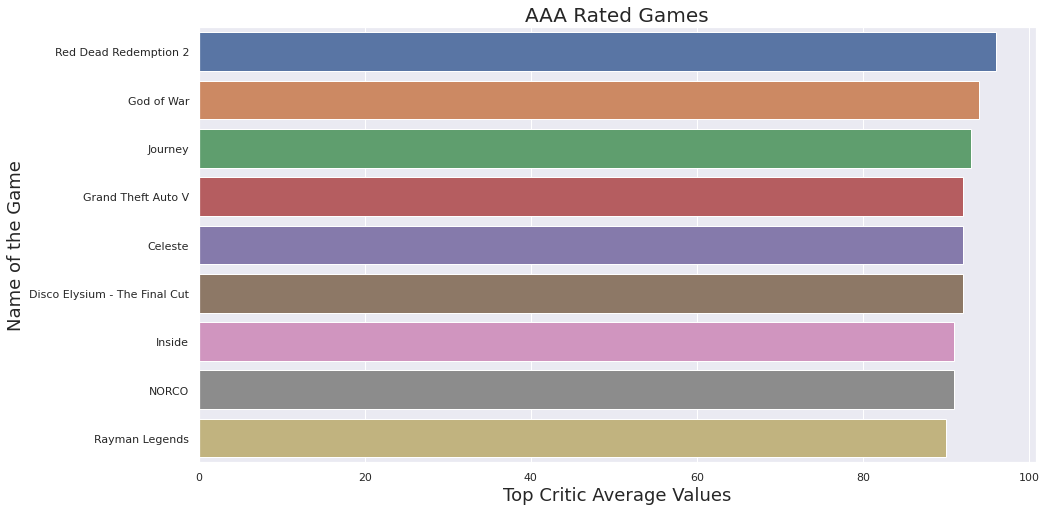

In [43]:
# plotting simple histogram to see top rated games
sns.set(rc = {'figure.figsize':(15,8)})
axis = sns.barplot(data=games_rated_aaa_df,
                   y="name",
                   x="Top Critic Average",
                   order=games_rated_aaa_df.sort_values("Top Critic Average", ascending=False).name)
plt.title("AAA Rated Games", fontsize=20)
plt.xlabel("Top Critic Average Values",fontsize =18)
plt.ylabel("Name of the Game", fontsize =18);

**The correlation matrix below shows multiple realtions.**

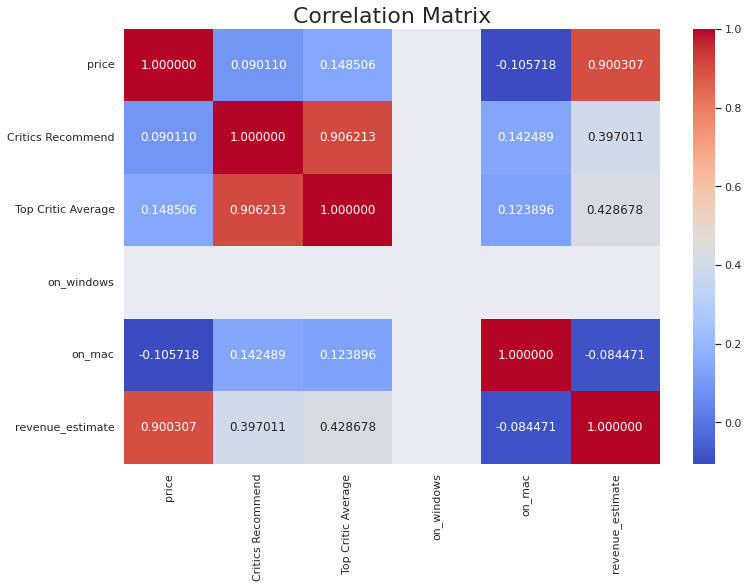

In [59]:
matrix = df.corr()
sns.heatmap(matrix, annot=True, fmt='f', cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=22)
plt.show();

**Is there any credibility to th rating system used in the dataset? The countplot below shoes that frequency of "Strong" rating is much more than any other and this shows that this suggests that even if the rating is not biased or skewed, getting good ratings is fairly easy for games. Can publishers tinker with the overall rating of the games.**

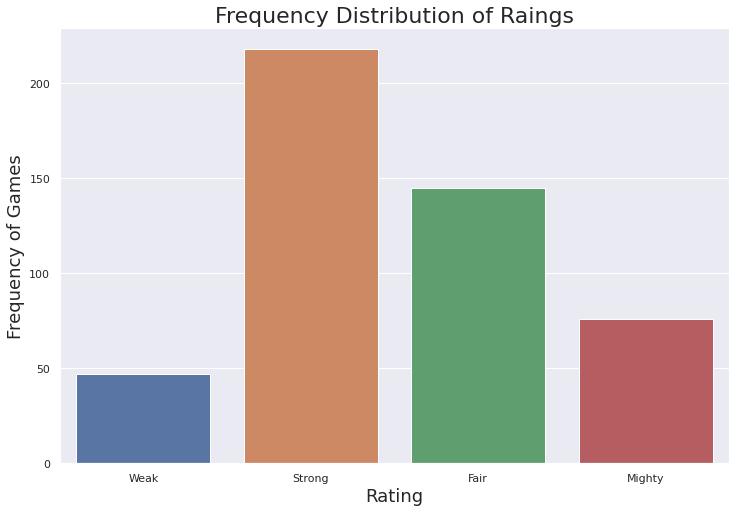

In [65]:
sns.countplot(x='OpenCritic Rating', data=df)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Frequency of Games', fontsize=18)

plt.title("Frequency Distribution of Raings", fontsize=22)
plt.show()

**In the recent years, there has been a steep rise in the price of AAA rated games. Lets try to visualize the relation between price and ratings. This will help us understand that does an average gamer needs to spend 'big bucks' to enjoy the best games or are good games availble in lower price range.**

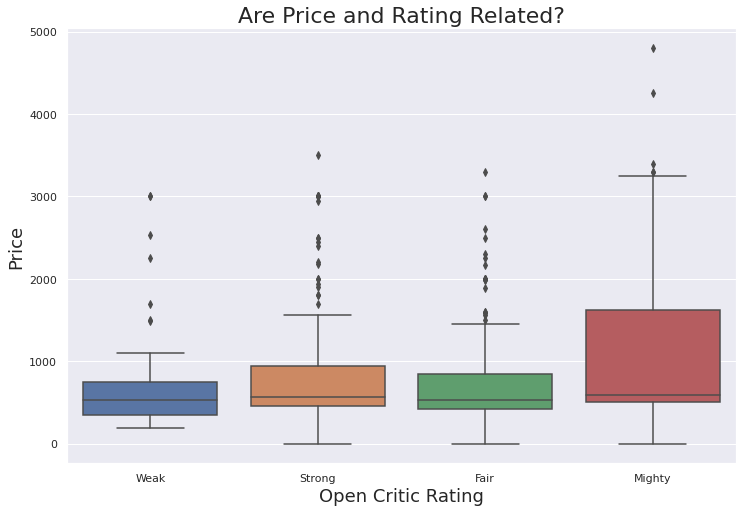

In [74]:
sns.boxplot(x='OpenCritic Rating', y='price', data=df)

plt.xlabel('Open Critic Rating', fontsize=18)
plt.ylabel('Price', fontsize=18)

plt.title("Are Price and Rating Related?",fontsize=22)
plt.show();

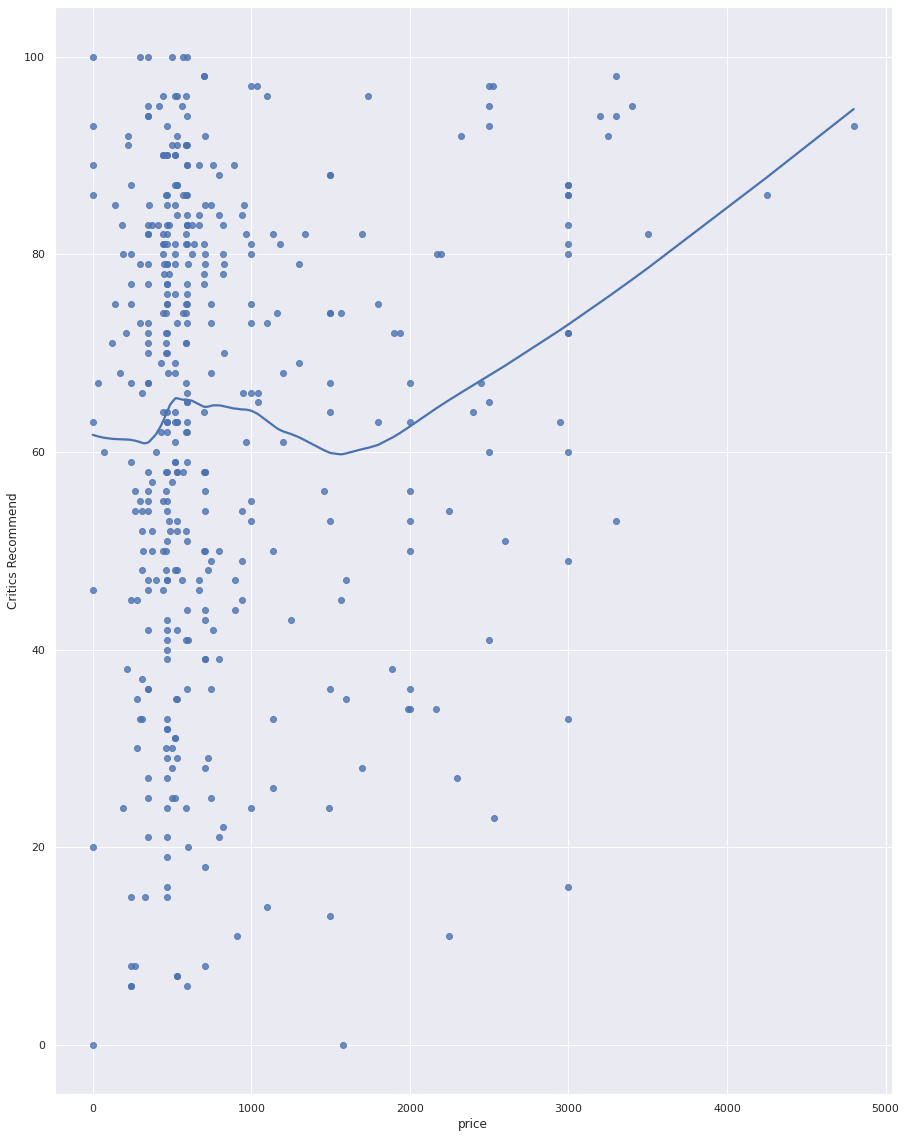

In [20]:
sns.regplot(x='price', y='Critics Recommend', data=df, lowess=True, ci='None')
plt.show()

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

In [22]:
df['price_bins'] = pd.qcut(df['price'], q=5)

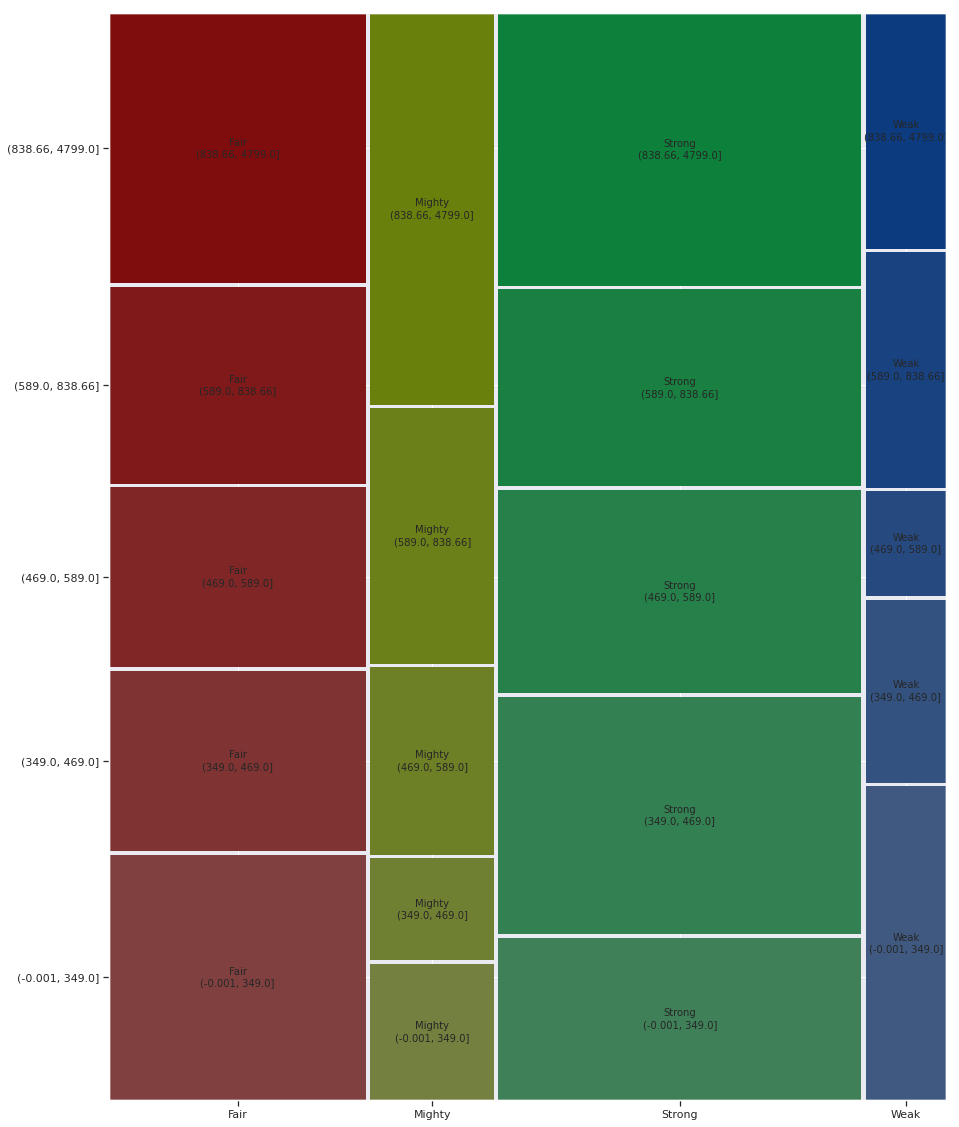

In [23]:
mosaic(data=df, index=['OpenCritic Rating', 'price_bins']);

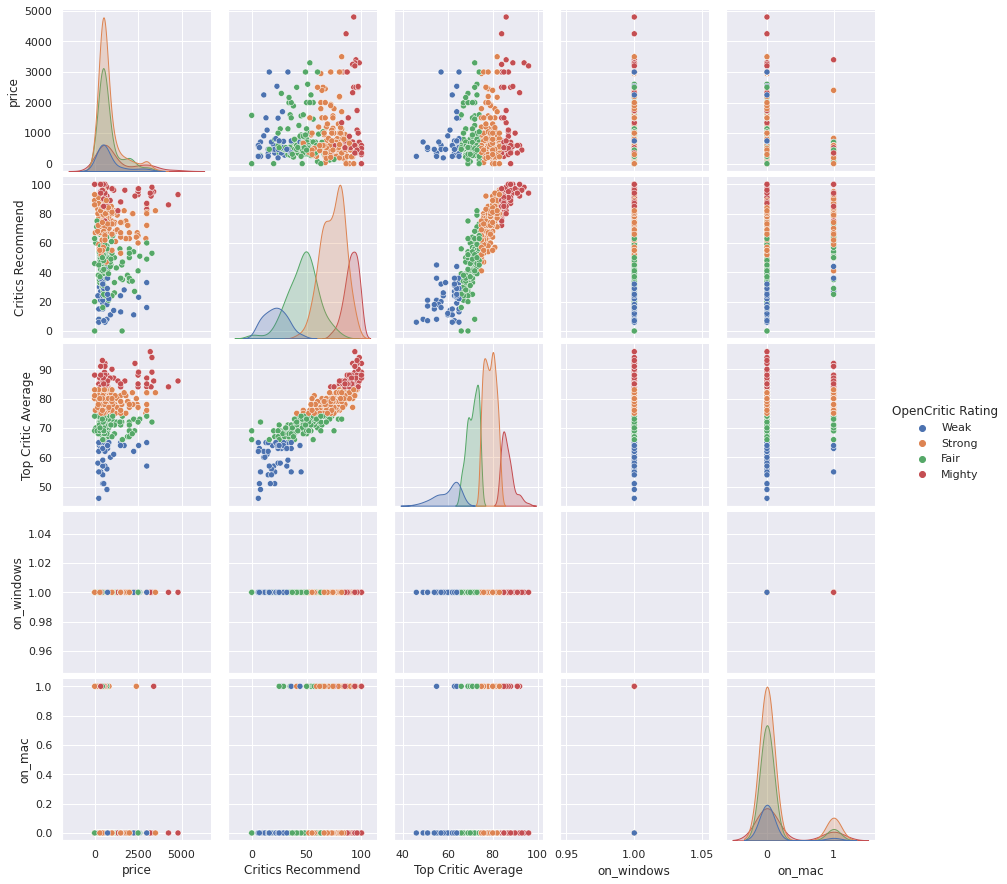

In [24]:
sns.pairplot(df, hue='OpenCritic Rating');

In [25]:
df

,name,price,genres,features,developer,publisher,release date,platform,memory,gpu,languages,Critics Recommend,Top Critic Average,OpenCritic Rating,on_windows,on_mac,price_bins
0,Ashwalkers,279.0,IndieSurvivalAdventure,Single Player,Nameless XIII,Dear Villagers,2021-04-15,WindowsWindows,2GB,NaN,NaN,30.0,64.0,Weak,1,0,"(-0.001, 349.0]"
1,NecroLand: Undead Corps,239.0,Action,Co-opMultiplayerCompetitiveSingle Player,JANUS LABS,"Nicalis, Inc.",2021-06-30,WindowsWindowsMac OSMac OS,256MB Video Memory,500 MB,NaN,NaN,NaN,NaN,1,1,"(-0.001, 349.0]"
2,Ageless,458.0,ActionAdventurePlatformer,NaN,One More Dream Studios,Team17 Digital Ltd.,2020-07-29,WindowsWindows,2GB,NaN,NaN,NaN,NaN,NaN,1,0,"(349.0, 469.0]"
3,Expeditions: Rome,1499.0,RPGStrategy,Single Player,Logic Artists,THQ Nordic,2022-01-20,WindowsWindows,8 GB,30 GB,NaN,74.0,81.0,Strong,1,0,"(838.66, 4799.0]"
4,The Medium,2949.0,HorrorAdventure,Single Player,Bloober Team,Bloober Team S.A.,2021-01-28,WindowsWindows,8,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,NaN,63.0,75.0,Strong,1,0,"(838.66, 4799.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Watch Dogs 2,3499.0,ActionAdventure,Co-opSingle Player,Ubisoft Montreal,Ubisoft Entertainment,2016-11-15,WindowsWindows,6 GB RAM,50 GB,NaN,82.0,82.0,Strong,1,0,"(838.66, 4799.0]"
895,Magic: The Gathering Arena,0.0,StrategyCard Game,Multiplayer,Wizards of the Coast,Wizards of the Coast,2020-01-16,WindowsWindowsMac OSMac OS,GeForce GTX 8800 or Equivalent,NaN,NaN,93.0,83.0,Strong,1,1,"(-0.001, 349.0]"
896,NORCO,349.0,NarrationAdventurePuzzle,Single Player,Geography of Robots,Raw Fury,2022-03-24,WindowsWindowsMac OSMac OS,4GB,3GB,"Text: English, French, German, Spanish (Spain)...",94.0,91.0,Mighty,1,1,"(-0.001, 349.0]"
897,Insurmountable,299.5,StrategyRogue-LiteSurvival,Single Player,ByteRockers' Games,Daedalic Entertainment,2022-04-14,Windows,8 GB RAM,4 GB available space,"Text: Portuguese, Spanish (Spain), French, Ger...",55.0,80.0,Strong,1,0,"(-0.001, 349.0]"


In [26]:
critics = df.dropna(subset = ['OpenCritic Rating'])
critics

,name,price,genres,features,developer,publisher,release date,platform,memory,gpu,languages,Critics Recommend,Top Critic Average,OpenCritic Rating,on_windows,on_mac,price_bins
0,Ashwalkers,279.0,IndieSurvivalAdventure,Single Player,Nameless XIII,Dear Villagers,2021-04-15,WindowsWindows,2GB,NaN,NaN,30.0,64.0,Weak,1,0,"(-0.001, 349.0]"
3,Expeditions: Rome,1499.0,RPGStrategy,Single Player,Logic Artists,THQ Nordic,2022-01-20,WindowsWindows,8 GB,30 GB,NaN,74.0,81.0,Strong,1,0,"(838.66, 4799.0]"
4,The Medium,2949.0,HorrorAdventure,Single Player,Bloober Team,Bloober Team S.A.,2021-01-28,WindowsWindows,8,@1080p NVIDIA GeForce® GTX 1060 6GB / AMD Rade...,NaN,63.0,75.0,Strong,1,0,"(838.66, 4799.0]"
10,Pupperazzi,469.0,CasualComedyFirst Person,Single Player,Sundae Month,Kitfox Games,2022-01-20,WindowsWindowsMac OSMac OS,4 GB RAM,Intel HD Graphics,NaN,54.0,71.0,Fair,1,1,"(349.0, 469.0]"
15,ChromaGun,309.0,PuzzleFirst PersonIndie,Single Player,Pixel Maniacs,Pixel Maniacs,2021-11-03,Windows,2 GB RAM,NaN,NaN,33.0,71.0,Fair,1,0,"(-0.001, 349.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Watch Dogs 2,3499.0,ActionAdventure,Co-opSingle Player,Ubisoft Montreal,Ubisoft Entertainment,2016-11-15,WindowsWindows,6 GB RAM,50 GB,NaN,82.0,82.0,Strong,1,0,"(838.66, 4799.0]"
895,Magic: The Gathering Arena,0.0,StrategyCard Game,Multiplayer,Wizards of the Coast,Wizards of the Coast,2020-01-16,WindowsWindowsMac OSMac OS,GeForce GTX 8800 or Equivalent,NaN,NaN,93.0,83.0,Strong,1,1,"(-0.001, 349.0]"
896,NORCO,349.0,NarrationAdventurePuzzle,Single Player,Geography of Robots,Raw Fury,2022-03-24,WindowsWindowsMac OSMac OS,4GB,3GB,"Text: English, French, German, Spanish (Spain)...",94.0,91.0,Mighty,1,1,"(-0.001, 349.0]"
897,Insurmountable,299.5,StrategyRogue-LiteSurvival,Single Player,ByteRockers' Games,Daedalic Entertainment,2022-04-14,Windows,8 GB RAM,4 GB available space,"Text: Portuguese, Spanish (Spain), French, Ger...",55.0,80.0,Strong,1,0,"(-0.001, 349.0]"


In [27]:
df['revenue_estimate'] = critics['price'] * critics['Critics Recommend']

In [28]:
df.sort_values('revenue_estimate', ascending=False).head(10)

,name,price,genres,features,developer,publisher,release date,platform,memory,gpu,languages,Critics Recommend,Top Critic Average,OpenCritic Rating,on_windows,on_mac,price_bins,revenue_estimate
55,FINAL FANTASY VII REMAKE INTERGRADE,4799.0,ActionRPGAdventure,Controller Support,Square Enix,Square Enix,2021-12-16,WindowsWindows,8 GB,GeForce GTX 780 / Radeon RX 480 （3GB VRAM）,NaN,93.0,86.0,Mighty,1,0,"(838.66, 4799.0]",446307.0
330,OCTOPATH TRAVELER™,4250.0,RPG,Single PlayerController Support,"Square Enix, ACQUIRE Corp.",Square Enix,2021-03-25,WindowsWindows,4 GB RAM,30+ FPS @ 1280x720 / graphics preset “LOW”,NaN,86.0,84.0,Mighty,1,0,"(838.66, 4799.0]",365500.0
412,God of War,3299.0,ActionRPGAdventure,Single Player,Santa Monica Studio,PlayStation PC LLC,2022-01-14,WindowsWindows,8 GB DDR,NVIDIA GTX 960 (4 GB) or AMD R9 290X (4 GB),NaN,98.0,94.0,Mighty,1,0,"(838.66, 4799.0]",323302.0
66,Total War: WARHAMMER III,3399.0,ActionStrategy,Multiplayer,Creative Assembly,SEGA,2022-02-17,WindowsWindowsMac OSMac OS,6 GB,Nvidia GTX 900/AMD RX 400 series | Intel Iris ...,NaN,95.0,86.0,Mighty,1,1,"(838.66, 4799.0]",322905.0
535,Horizon Zero Dawn™ Complete Edition,3299.0,ActionRPGAction-AdventureAdventure,Single Player,Guerrilla,PlayStation PC LLC,2020-08-07,WindowsWindows,8GB RAM,Nvidia GeForce GTX 780 (3 GB)/AMD Radeon R9 29...,NaN,94.0,89.0,Mighty,1,0,"(838.66, 4799.0]",310106.0
811,Red Dead Redemption 2,3199.0,ActionNarrationOpen World,Single Player,Rockstar Games,Rockstar Games,2019-11-05,WindowsWindows,8GB,Sound Card: DirectX Compatible,NaN,94.0,96.0,Mighty,1,0,"(838.66, 4799.0]",300706.0
606,HITMAN - Game of the Year Edition,3249.0,ActionAction-AdventureShooterStealth,Single Player,IO Interactive A/S,IO Interactive A/S,2020-09-03,Windows,8,50,NaN,92.0,84.0,Mighty,1,0,"(838.66, 4799.0]",298908.0
894,Watch Dogs 2,3499.0,ActionAdventure,Co-opSingle Player,Ubisoft Montreal,Ubisoft Entertainment,2016-11-15,WindowsWindows,6 GB RAM,50 GB,NaN,82.0,82.0,Strong,1,0,"(838.66, 4799.0]",286918.0
111,XCOM® 2,2999.0,Strategy,Single Player,Firaxis,2K,2022-04-14,Windows,4 GB,45 GB,NaN,87.0,87.0,Mighty,1,0,"(838.66, 4799.0]",260913.0
875,Assassin's Creed Origins,2999.0,ActionAction-AdventureOpen WorldAdventure,Controller SupportSingle Player,Ubisoft Montreal,Ubisoft,2017-10-26,WindowsWindows,6 GB RAM,42 GB available space,NaN,87.0,85.0,Mighty,1,0,"(838.66, 4799.0]",260913.0


In [29]:
best_pusblishers = games_rated_aaa_df['publisher']
best_games_price = games_rated_aaa_df['price']

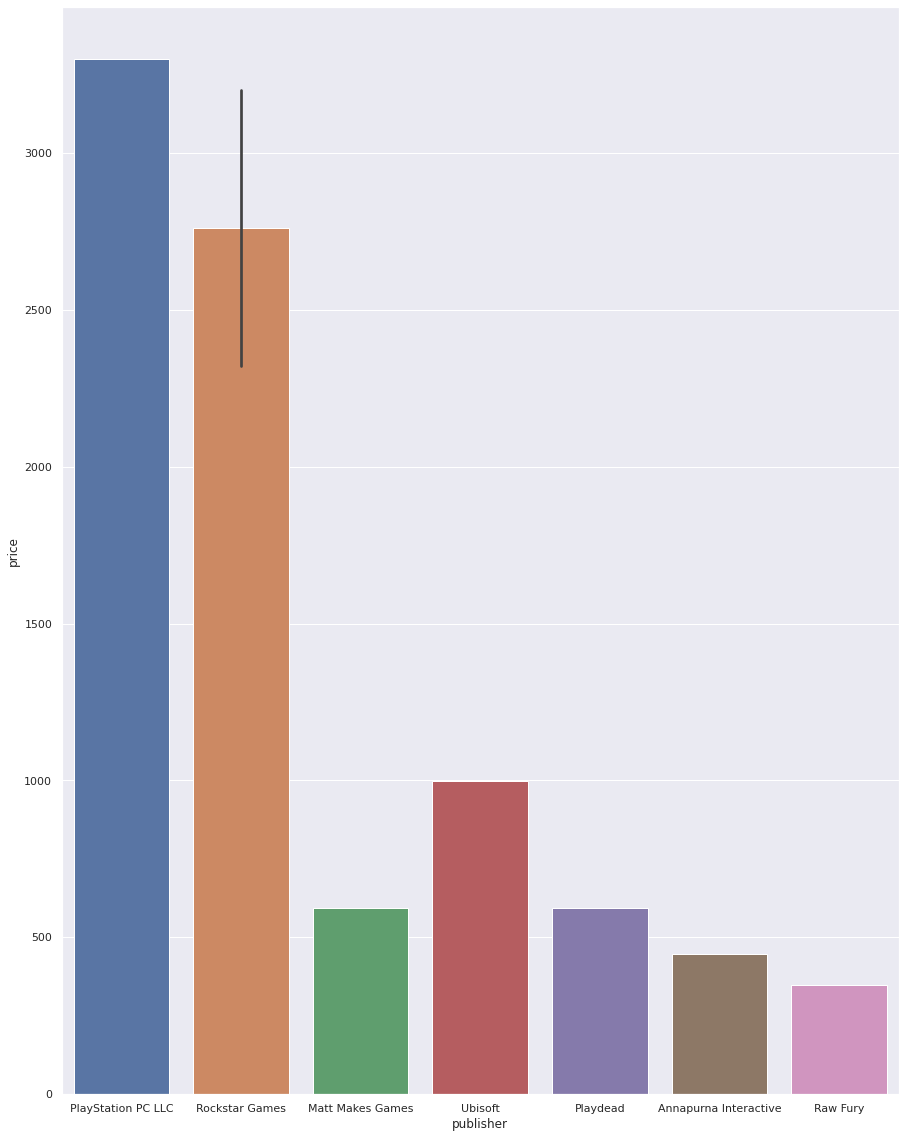

In [30]:
sns.barplot(x=best_pusblishers, y=best_games_price, data=df);

In [31]:
profit_max_publishers = df.sort_values('revenue_estimate', ascending=False).head(10).publisher
profit_max_games = df.sort_values('revenue_estimate', ascending=False).head(10).revenue_estimate

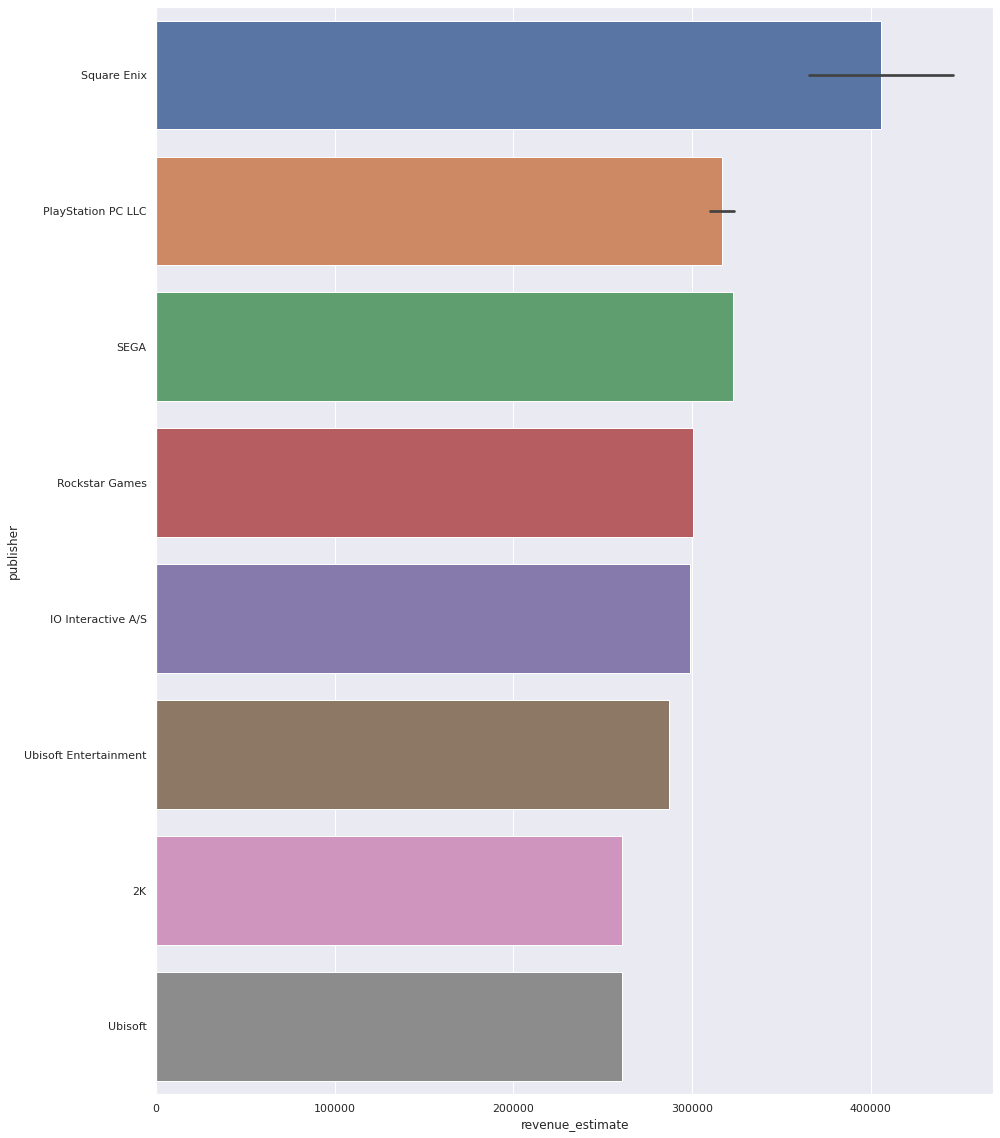

In [32]:
sns.barplot(x=profit_max_games, y=profit_max_publishers);

# Conclusion

## There is a lot of work still left in this notebook and future work is required with lots of dedication. 

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "21f2000830/untitled1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/21f2000830/untitled1


'https://jovian.ai/21f2000830/untitled1'